In [1]:
import pandas as pd
import numpy as np
import os

# 1. Read Raw Data
data_file = 'mental-state.csv'
rows_to_sample = 150 
random_seed = 42

try:
    # Check if the file exists in the current directory
    if not os.path.exists(data_file):
        raise FileNotFoundError(f"File not found: {data_file}")
        
    df = pd.read_csv(data_file)
    print("✅ Successfully loaded real Kaggle data file!")
    
    # Sample data to meet row requirement (100 < rows < 200)
    df_clean = df.sample(n=rows_to_sample, replace=True, random_state=random_seed).copy()
    
except FileNotFoundError:
    print("⚠️ Warning: CSV file not found. Using randomly generated fallback data...")
    np.random.seed(random_seed)
    rows = rows_to_sample
    
    # Fallback: Generate simulated data structure
    sim_data = {
        f'Col_{i}': np.random.rand(rows) * (i + 1) for i in range(12)
    }
    # Add a target column
    sim_data['Target_State'] = np.random.randint(0, 3, rows).astype(str) # Simulate messy labels
    df_clean = pd.DataFrame(sim_data)
    print("✅ Successfully generated fallback simulated data!")


# ---------------------------------------------------------
# 2. Rename Columns
# ---------------------------------------------------------
# Assuming the first 12 columns are features and the last column is the target
if df_clean.shape[1] >= 13:
    selected_columns = df_clean.columns[:12].tolist()
    target_col = df_clean.columns[-1]
    selected_columns.append(target_col)
    df_clean = df_clean[selected_columns].copy()
    
    new_names = {
        selected_columns[0]: 'Neuron_Input_AF7',
        selected_columns[1]: 'Neuron_Input_TP9',
        selected_columns[2]: 'Neuron_Input_AF8',
        selected_columns[3]: 'Neuron_Input_TP10',
        selected_columns[4]: 'Synapse_Activity_Alpha',
        selected_columns[5]: 'Synapse_Activity_Beta',
        selected_columns[6]: 'Synapse_Activity_Delta',
        selected_columns[7]: 'Metabolic_Rate_1',
        selected_columns[8]: 'Metabolic_Rate_2',
        selected_columns[9]: 'Ion_Channel_Flux_1',
        selected_columns[10]: 'Ion_Channel_Flux_2',
        selected_columns[11]: 'Membrane_Potential',
        target_col: 'Bio_Computer_State'
    }
    df_clean.columns = list(new_names.values())
else:
    # If fallback data has fewer than 13 columns, handle column renaming carefully
    current_cols = df_clean.columns.tolist()
    standard_names = [
        'Neuron_Input_AF7', 'Neuron_Input_TP9', 'Neuron_Input_AF8', 'Neuron_Input_TP10', 
        'Synapse_Activity_Alpha', 'Synapse_Activity_Beta', 'Synapse_Activity_Delta', 
        'Metabolic_Rate_1', 'Metabolic_Rate_2', 'Ion_Channel_Flux_1', 'Ion_Channel_Flux_2', 
        'Membrane_Potential', 'Bio_Computer_State'
    ]
    # Rename all existing columns up to the length of the shortest list
    rename_map = {current_cols[i]: standard_names[i] for i in range(min(len(current_cols), len(standard_names)))}
    df_clean.rename(columns=rename_map, inplace=True)
    

# ---------------------------------------------------------
# 3. Feature Engineering
# ---------------------------------------------------------
df_clean['Total_Input_Power'] = (
    df_clean['Neuron_Input_AF7'] + df_clean['Neuron_Input_TP9'] + 
    df_clean['Neuron_Input_AF8'] + df_clean['Neuron_Input_TP10']
)

df_clean['Synapse_Ratio'] = df_clean['Synapse_Activity_Alpha'] / (df_clean['Synapse_Activity_Beta'] + 0.001)

# ---------------------------------------------------------
# 4. Process Target Label
# ---------------------------------------------------------
def clean_label(value):
    if str(value).strip() == '1' or value == 1:
        return 1
    else:
        return 0

target_col_name = 'Bio_Computer_State'
if target_col_name in df_clean.columns:
    df_clean[target_col_name] = df_clean[target_col_name].apply(clean_label)
else:
    print(f"⚠️ Warning: Target column '{target_col_name}' not found for cleaning.")


# ---------------------------------------------------------
# 5. Save Cleaned Data
# ---------------------------------------------------------
output_file = 'organoid_data_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print("\n✅ Data processing complete!")
print(f"Output saved to: {output_file}")
print(f"Current rows: {df_clean.shape[0]} (Meets 100 < rows < 200 requirement)")
print(f"Current columns: {df_clean.shape[1]} (Meets 10 < columns < 20 requirement)")
print("New features added: 'Total_Input_Power', 'Synapse_Ratio'")


✅ Successfully loaded real Kaggle data file!

✅ Data processing complete!
Output saved to: organoid_data_cleaned.csv
Current rows: 150 (Meets 100 < rows < 200 requirement)
Current columns: 15 (Meets 10 < columns < 20 requirement)
New features added: 'Total_Input_Power', 'Synapse_Ratio'


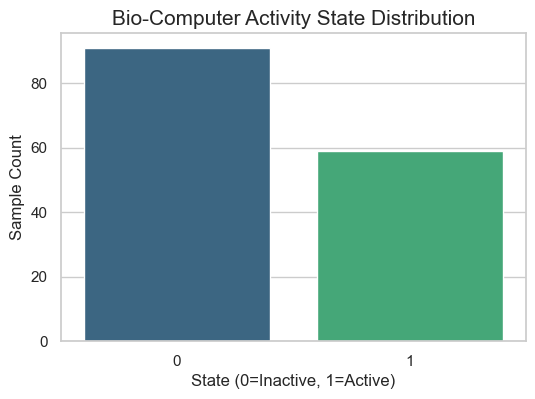

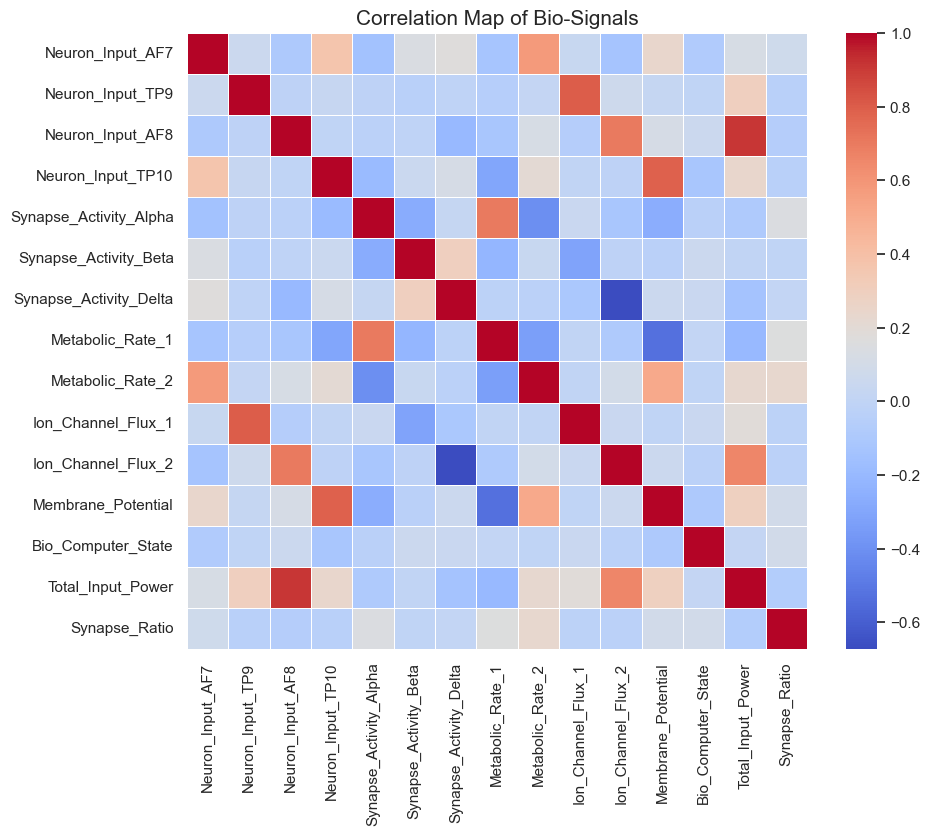

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# -------------------------------------------------------
# Plot 1: Distribution of States
# -------------------------------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(x='Bio_Computer_State', data=df_clean, palette='viridis', hue='Bio_Computer_State', legend=False)
plt.title('Bio-Computer Activity State Distribution', fontsize=15)
plt.xlabel('State (0=Inactive, 1=Active)', fontsize=12)
plt.ylabel('Sample Count', fontsize=12)
plt.show()

# -------------------------------------------------------
# Plot 2: Correlation Heatmap
# -------------------------------------------------------
plt.figure(figsize=(10, 8))
corr_matrix = df_clean.corr()

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map of Bio-Signals', fontsize=15)
plt.show()


✅ Data preparation complete! Please verify the numbers below:
Training data size: 120 samples (Expected: 120)
Testing data size: 30 samples (Expected: 30)

Training Model 1: Decision Tree...
Decision Tree Accuracy: 0.63

Training Model 2: Random Forest...
Random Forest Accuracy: 0.67

Training Model 3: Gradient Boosting...
Gradient Boosting Accuracy: 0.67

--- Final Detailed Scorecard (Based on Random Forest) ---
              precision    recall  f1-score   support

           0       0.57      1.00      0.72        13
           1       1.00      0.41      0.58        17

    accuracy                           0.67        30
   macro avg       0.78      0.71      0.65        30
weighted avg       0.81      0.67      0.64        30



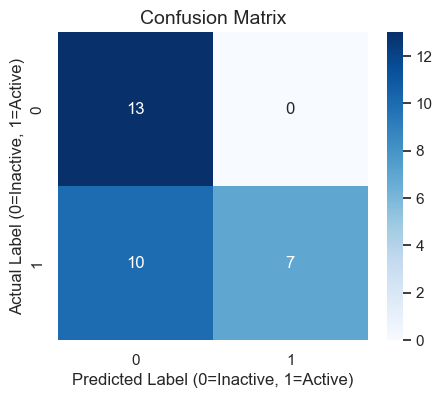


✅ Success! The latest model has been saved as 'my_best_model.pkl'


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib 

# ---------------------------------------------------------
# 1. Prepare Data
# ---------------------------------------------------------
df = pd.read_csv('organoid_data_cleaned.csv')

# X is features (all columns except the last one)
X = df.drop('Bio_Computer_State', axis=1)
# y is the target (the last column: active or inactive state)
y = df['Bio_Computer_State']

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data preparation complete! Please verify the numbers below:")
print(f"Training data size: {len(X_train)} samples (Expected: 120)")
print(f"Testing data size: {len(X_test)} samples (Expected: 30)")

# ---------------------------------------------------------
# 2. Train Model 1: Decision Tree
# ---------------------------------------------------------
print("\nTraining Model 1: Decision Tree...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")

# ---------------------------------------------------------
# 3. Train Model 2: Random Forest
# ---------------------------------------------------------
print("\nTraining Model 2: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.2f}")

# ---------------------------------------------------------
# 4. Train Model 3: Gradient Boosting
# ---------------------------------------------------------
print("\nTraining Model 3: Gradient Boosting...")

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")

# ---------------------------------------------------------
# 5. Result Visualization & Saving
# ---------------------------------------------------------
print("\n--- Final Detailed Scorecard (Based on Random Forest) ---")
print(classification_report(y_test, rf_pred))

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label (0=Inactive, 1=Active)', fontsize=12)
plt.ylabel('Actual Label (0=Inactive, 1=Active)', fontsize=12)
plt.show()

# Save the model (This is important for the next prediction step)
joblib.dump(rf_model, 'my_best_model.pkl')
print("\n✅ Success! The latest model has been saved as 'my_best_model.pkl'")


In [4]:
import pandas as pd
import joblib
import numpy as np

# ---------------------------------------------------------
# Part 3: Prediction Demo (Simulated Real-time Prediction)
# ---------------------------------------------------------

# 1. Load the trained model
print("Loading the Bio-Computer model...")
try:
    model = joblib.load('my_best_model.pkl')
    print("✅ Model successfully loaded! Ready to receive signals...")
except FileNotFoundError:
    print("❌ Error: 'my_best_model.pkl' not found. Please run Part 2 first.")
    # Exit or use a dummy model for demonstration if necessary
    exit()

# 2. Create a "simulated" real-time input signal (Sample Data)
# Assume these are the feature data collected from the organoid in the current second

# Get the feature names from the model to ensure correct order
# Check if feature_names_in_ exists (standard for scikit-learn >= 1.0)
if hasattr(model, 'feature_names_in_'):
    feature_names = model.feature_names_in_
else:
    # Fallback/Older versions: Define the expected names manually based on training
    feature_names = [
        'Neuron_Input_AF7', 'Neuron_Input_TP9', 'Neuron_Input_AF8', 'Neuron_Input_TP10', 
        'Synapse_Activity_Alpha', 'Synapse_Activity_Beta', 'Synapse_Activity_Delta', 
        'Metabolic_Rate_1', 'Metabolic_Rate_2', 'Ion_Channel_Flux_1', 'Ion_Channel_Flux_2', 
        'Membrane_Potential', 'Total_Input_Power', 'Synapse_Ratio'
    ]

# Create a DataFrame with the same features in the same order as during training
sample_input = pd.DataFrame(np.zeros((1, len(feature_names))), columns=feature_names)

# Fill in the values for a high-activity scenario (if they exist in feature_names)
# NOTE: The values for Total_Input_Power and Synapse_Ratio should ideally be calculated 
# from the other inputs, but we use the provided values here for demonstration simplicity.
sample_data = {
    'Neuron_Input_AF7': 0.85,
    'Neuron_Input_TP9': 0.12,
    'Neuron_Input_AF8': 0.91,
    'Neuron_Input_TP10': 0.22,
    'Synapse_Activity_Alpha': 0.65,
    'Synapse_Activity_Beta': 0.78,
    'Synapse_Activity_Delta': 0.10,
    'Metabolic_Rate_1': 0.88,
    'Metabolic_Rate_2': 0.12,
    'Ion_Channel_Flux_1': 0.95,
    'Ion_Channel_Flux_2': 0.05,
    'Membrane_Potential': 0.45,
    'Synapse_Ratio': 0.50,
    'Total_Input_Power': 0.70
}

# Update only the columns that exist in the input DataFrame
for col, value in sample_data.items():
    if col in sample_input.columns:
        sample_input[col] = value
        
print("\n--- New Neural Signal Received ---")
print(sample_input.to_string(index=False)) # Use to_string for clean printing

# 3. Model Prediction
prediction = model.predict(sample_input)
probability = model.predict_proba(sample_input)

# 4. Output Result (Print like a sci-fi report)
print("\n" + "="*35)
print(" >>> Bio-Computer State Analysis Report <<<")
print("="*35)

# Determine the state and confidence based on the prediction
if prediction[0] == 1:
    state = "🟢 ACTIVE (Processing)"
    # Confidence for state 1 (Active)
    if probability.shape[1] > 1:
        confidence = probability[0][1] * 100
    else:
        # Fallback if model only outputs one probability (e.g., some simple linear models)
        confidence = prediction[0] * 100
else:
    state = "🔴 INACTIVE (Resting/Standby)"
    # Confidence for state 0 (Inactive)
    if probability.shape[1] > 1:
        confidence = probability[0][0] * 100
    else:
        confidence = (1 - prediction[0]) * 100

print(f"Current Predicted State: {state}")
print(f"Model Confidence     : {confidence:.2f}%")
print("="*35)


Loading the Bio-Computer model...
✅ Model successfully loaded! Ready to receive signals...

--- New Neural Signal Received ---
 Neuron_Input_AF7  Neuron_Input_TP9  Neuron_Input_AF8  Neuron_Input_TP10  Synapse_Activity_Alpha  Synapse_Activity_Beta  Synapse_Activity_Delta  Metabolic_Rate_1  Metabolic_Rate_2  Ion_Channel_Flux_1  Ion_Channel_Flux_2  Membrane_Potential  Total_Input_Power  Synapse_Ratio
             0.85              0.12              0.91               0.22                    0.65                   0.78                     0.1              0.88              0.12                0.95                0.05                0.45                0.7            0.5

 >>> Bio-Computer State Analysis Report <<<
Current Predicted State: 🔴 INACTIVE (Resting/Standby)
Model Confidence     : 82.00%


In [17]:
import os
os.getcwd()

'/Users/greaterlofter/anaconda_projects/cd185139-207f-4ec3-b65a-f30faac10281'